
# Introducción a **NumPy**, **Pandas**, **Matplotlib** y **Plotly** 🧠📊

Este notebook está diseñado para aprender y practicar cuatro librerías clave del ecosistema de *Data Science* en Python:

- **NumPy**: cálculo numérico con arreglos y operaciones vectorizadas.
- **Pandas**: manipulación y análisis de datos con *DataFrames*.
- **Matplotlib**: visualización estática.
- **Plotly**: visualización interactiva.

Cada sección incluye: objetivo, teoría breve, ejemplos y **ejercicios prácticos** (con indicaciones). Al final, integrarás todo en un mini-proyecto.



## 0) Preparación del entorno
Instala (si hace falta) y carga las librerías.


In [37]:

# Si alguna librería no está instalada, descomenta las líneas:
# !pip install numpy pandas matplotlib plotly

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# Ajustes útiles para Jupyter
%load_ext autoreload
%autoreload 2
print("Versión NumPy:", np.__version__)
print("Versión Pandas:", pd.__version__)
print("Matplotlib OK")
print("Plotly OK")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Versión NumPy: 2.1.3
Versión Pandas: 2.2.3
Matplotlib OK
Plotly OK



---
## 1) NumPy — Cálculo Numérico 🧮

**Objetivo de aprendizaje:**  
Comprender el uso de **arrays** y operaciones vectorizadas, y aplicar funciones estadísticas y de álgebra lineal.

**Conceptos clave:**
- `np.array`, `dtype`, formas (shape)
- Indexación y *slicing*
- Operaciones vectorizadas y *broadcasting*
- Funciones estadísticas (`mean`, `std`, `sum`), aleatoriedad (`np.random`)
- Álgebra lineal (`np.linalg`)


In [38]:

# Creación de arrays y propiedades básicas
a = np.array([1, 2, 3, 4, 5])
b = np.arange(1, 11)        # 1..10
c = np.linspace(0, 1, 5)    # 5 puntos entre 0 y 1

print("a:", a, "| dtype:", a.dtype, "| shape:", a.shape)
print("b:", b)
print("c:", c)

# Indexación y slicing
print("b[0]:", b[0], " | b[-1]:", b[-1])
print("b[2:6]:", b[2:6])
print("b[::2] (pares por salto):", b[::2])


a: [1 2 3 4 5] | dtype: int64 | shape: (5,)
b: [ 1  2  3  4  5  6  7  8  9 10]
c: [0.   0.25 0.5  0.75 1.  ]
b[0]: 1  | b[-1]: 10
b[2:6]: [3 4 5 6]
b[::2] (pares por salto): [1 3 5 7 9]


In [39]:
print("a[0]:", b[0], " | a[-1]:", a[-1])


a[0]: 1  | a[-1]: 5


In [40]:
print("a[1:3]:", a[1:4])

a[1:3]: [2 3 4]


In [41]:
print("a[::2]:", a[1:2])

a[::2]: [2]


In [42]:

# Operaciones vectorizadas y broadcasting
x = np.array([10, 20, 30, 40])
y = np.array([1, 2, 3, 4])

print("x + y:", x + y)
print("x * 2:", x * 2)
print("x ** 2:", x ** 2)

M = np.ones((3, 3))
print("M:\n", M)
v = np.array([1, 2, 3])
print("Vector v:", v)  
print("Broadcasting M + v:", M + v)  # v se "expande" por filas


x + y: [11 22 33 44]
x * 2: [20 40 60 80]
x ** 2: [ 100  400  900 1600]
M:
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
Vector v: [1 2 3]
Broadcasting M + v: [[2. 3. 4.]
 [2. 3. 4.]
 [2. 3. 4.]]


In [43]:

# Aleatoriedad y estadísticas
np.random.seed(42)
rand = np.random.normal(loc=50, scale=10, size=1000)
print("Primeros 10 valores aleatroios:", rand[:10])
print("Media:", rand.mean(), " | Desv. estándar:", rand.std(), " | Mín:", rand.min(), " | Máx:", rand.max())


Primeros 10 valores aleatroios: [54.96714153 48.61735699 56.47688538 65.23029856 47.65846625 47.65863043
 65.79212816 57.67434729 45.30525614 55.42560044]
Media: 50.193320558223256  | Desv. estándar: 9.787262077473542  | Mín: 17.58732659930927  | Máx: 88.52731490654722


In [44]:

# Álgebra lineal
A = np.array([[2, 1], [5, 3]])
b = np.array([1, 2])

det = np.linalg.det(A)
sol = np.linalg.solve(A, b)
vals, vecs = np.linalg.eig(A)

print("Determinante:", det)
print("Solución de Ax=b:", sol)
print("Autovalores:", vals)
print("Autovectores:", vecs)


Determinante: 1.0000000000000009
Solución de Ax=b: [ 1. -1.]
Autovalores: [0.20871215 4.79128785]
Autovectores: [[-0.48744474 -0.33726692]
 [ 0.87315384 -0.94140906]]



### 🧩 Ejercicios (NumPy)
1. Crea un array del 1 al 100 y calcula: media, mediana, varianza y percentil 90.  
2. Genera una matriz aleatoria de 5x5 (normal estándar) y calcula su determinante y traza.  
3. Con `np.random.randint`, genera 1000 enteros entre 0 y 10 y calcula su **distribución de frecuencias** usando `np.unique(..., return_counts=True)`.
4. Normaliza un vector `v` restando su media y dividiendo por su desviación estándar.



---
## 2) Pandas — Manipulación y Análisis de Datos 📚

**Objetivo de aprendizaje:**  
Leer, inspeccionar, limpiar, transformar y resumir datos en un **DataFrame**.

**Conceptos clave:**
- `Series` y `DataFrame`
- Lectura de datos (`read_csv`, `read_excel`)
- Selección y filtrado (`loc`, `iloc`, condiciones)
- Transformaciones (`assign`, `apply`, `groupby`, `pivot_table`)
- Valores faltantes (`isna`, `fillna`, `dropna`), *merge/join*


In [45]:

# Dataset de ejemplo (ventas ficticias)
datos = {
    "fecha": pd.date_range("2024-01-01", periods=12, freq="M"),
    "categoria": ["A", "B", "C"] * 4,
    "producto": ["P1", "P2", "P3"] * 4,
    "precio": [10, 12, 9, 11, 10, 8, 12, 14, 9, 13, 12, 10],
    "cantidad": [5, 3, 6, 2, 8, 1, 4, 5, 7, 3, 2, 6],
}
df = pd.DataFrame(datos)
df.head()


C:\Users\kenny\AppData\Local\Temp\ipykernel_17280\1058162892.py:3: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



,fecha,categoria,producto,precio,cantidad
0,2024-01-31,A,P1,10,5
1,2024-02-29,B,P2,12,3
2,2024-03-31,C,P3,9,6
3,2024-04-30,A,P1,11,2
4,2024-05-31,B,P2,10,8


In [46]:
estudiantes = {
    "nombre": ["Gilson", "Kenny", "David", "Anthony", "Carmen", "Freddy", "Jhon", "David", "Jhony", "Alex", "Maura", "Stalyn", "Edwin", "Erik", "Wendy", "Adriana"],
    "apellidos": ["Tenemea", "Valdivieso", "Lopez", "Fajardo", "Gomez", "Neira", "Montenegro", "Espinosa", "Mendez", "Loja", "Calle", "Pezantes", "Choes", "Chacon", "Llivichusca", "Cornejo"],
    # listas deben tener la misma longitud que 'nombre' y 'apellidos' (16)
    "edad": [23, 21, 22, 24, 23, 22, 25, 21, 20, 22, 23, 24, 26, 22, 21, 23],
    "nota": [88, 92, 79, 85, 90, 76, 83, 79, 81, 87, 91, 74, 78, 82, 89, 86],
    # una lista de asignaturas por cada estudiante (16 entradas)
    "asignaturas": [
        ["Inteligencia Artificial", "Formulación de Proyectos"],
        ["Aplicaciones Seguras", "Gestión de Proyectos"],
        ["Aplicaciones en la nube"],
        ["Inteligencia Artificial", "Aprendizaje Automático"],
        ["Bases de Datos", "Gestión de Proyectos"],
        ["Redes", "Seguridad Informática"],
        ["Programación Avanzada", "Arquitectura de Software"],
        ["Aplicaciones en la nube", "DevOps"],
        ["Sistemas Operativos"],
        ["Programación", "Estructuras de Datos"],
        ["Interfaces de Usuario"],
        ["Ingeniería de Software", "Calidad de Software"],
        ["Matemáticas Discretas"],
        ["Optimización", "Algoritmos"],
        ["Ética Profesional"],
        ["Gestión de Proyectos", "Emprendimiento"]
    ],
}
df_estudiantes = pd.DataFrame(estudiantes)  
df_estudiantes.head()


,nombre,apellidos,edad,nota,asignaturas
0,Gilson,Tenemea,23,88,"[Inteligencia Artificial, Formulación de Proye..."
1,Kenny,Valdivieso,21,92,"[Aplicaciones Seguras, Gestión de Proyectos]"
2,David,Lopez,22,79,[Aplicaciones en la nube]
3,Anthony,Fajardo,24,85,"[Inteligencia Artificial, Aprendizaje Automático]"
4,Carmen,Gomez,23,90,"[Bases de Datos, Gestión de Proyectos]"


In [47]:
print(df_estudiantes.columns)


Index(['nombre', 'apellidos', 'edad', 'nota', 'asignaturas'], dtype='object')


In [48]:
df_A = df_estudiantes[df_estudiantes["apellidos"]=='Valdivieso']
df_altas = df_estudiantes[df_estudiantes["edad"]>24]
df_A
df_altas


,nombre,apellidos,edad,nota,asignaturas
6,Jhon,Montenegro,25,83,"[Programación Avanzada, Arquitectura de Software]"
12,Edwin,Choes,26,78,[Matemáticas Discretas]


Agrupacion y agregacion

In [49]:
##ventas_categoria =df_estudiantes.groupby("nombres")["edad"].sum()

##ventas_categoria =df_estudiantes

##FALTA....

In [50]:
##ORDENAMIENTO.
df_sorted=df.sort_values(by="cantidad",ascending=False)
print("Ventas ordenadas por precio: \n" , df_sorted)

Ventas ordenadas por precio: 
         fecha categoria producto  precio  cantidad
4  2024-05-31         B       P2      10         8
8  2024-09-30         C       P3       9         7
2  2024-03-31         C       P3       9         6
11 2024-12-31         C       P3      10         6
0  2024-01-31         A       P1      10         5
7  2024-08-31         B       P2      14         5
6  2024-07-31         A       P1      12         4
1  2024-02-29         B       P2      12         3
9  2024-10-31         A       P1      13         3
3  2024-04-30         A       P1      11         2
10 2024-11-30         B       P2      12         2
5  2024-06-30         C       P3       8         1


In [51]:
df["total"]=df["precio"]*df["cantidad"]
print("el total es: \n",df)

el total es: 
         fecha categoria producto  precio  cantidad  total
0  2024-01-31         A       P1      10         5     50
1  2024-02-29         B       P2      12         3     36
2  2024-03-31         C       P3       9         6     54
3  2024-04-30         A       P1      11         2     22
4  2024-05-31         B       P2      10         8     80
5  2024-06-30         C       P3       8         1      8
6  2024-07-31         A       P1      12         4     48
7  2024-08-31         B       P2      14         5     70
8  2024-09-30         C       P3       9         7     63
9  2024-10-31         A       P1      13         3     39
10 2024-11-30         B       P2      12         2     24
11 2024-12-31         C       P3      10         6     60


In [52]:
##Manejo de valores faltantes
df_missing=df.copy()
df_missing.loc[3,"precio"]=np.nan
print("antes manejar valores faltantes: \n",df_missing)

df_missing["precio"].fillna(df_missing["precio"].mean,inplace=True)
print("Despues de manejar valores faltantes: \n",df_missing)


###########---------Metodos para aprender
##filna.
##dropna
##df.isna().sum()


antes manejar valores faltantes: 
         fecha categoria producto  precio  cantidad  total
0  2024-01-31         A       P1    10.0         5     50
1  2024-02-29         B       P2    12.0         3     36
2  2024-03-31         C       P3     9.0         6     54
3  2024-04-30         A       P1     NaN         2     22
4  2024-05-31         B       P2    10.0         8     80
5  2024-06-30         C       P3     8.0         1      8
6  2024-07-31         A       P1    12.0         4     48
7  2024-08-31         B       P2    14.0         5     70
8  2024-09-30         C       P3     9.0         7     63
9  2024-10-31         A       P1    13.0         3     39
10 2024-11-30         B       P2    12.0         2     24
11 2024-12-31         C       P3    10.0         6     60
Despues de manejar valores faltantes: 
 

C:\Users\kenny\AppData\Local\Temp\ipykernel_17280\151517734.py:6: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<bound method Series.mean of 0     10.0
1     12.0
2      9.0
3      NaN
4     10.0
5      8.0
6     12.0
7     14.0
8      9.0
9     13.0
10    12.0
11    10.0
Name: precio, dtype: float64>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



RecursionError: maximum recursion depth exceeded

In [ ]:
#Merge y join

df2=pd.DataFrame

In [ ]:

# Exploración básica
df.describe()
df.info()

NameError: name 'df' is not defined

In [ ]:

# Transformaciones: crear columna total y filtrar
df = df.assign(total=df["precio"] * df["cantidad"])
df_filtrado = df[df["total"] > 60]
display(df_filtrado.head())

# Agrupaciones
resumen_categoria = df.groupby("categoria", as_index=False).agg(
    ventas_totales=("total", "sum"),
    cantidad_total=("cantidad", "sum"),
    precio_promedio=("precio", "mean"),
)
display(resumen_categoria)

# Pivot table: total por mes y categoría
tabla_pivot = pd.pivot_table(
    df, values="total", index="fecha", columns="categoria", aggfunc="sum"
)
display(tabla_pivot)


,fecha,categoria,producto,precio,cantidad,total
4,2024-05-31,B,P2,10,8,80
7,2024-08-31,B,P2,14,5,70
8,2024-09-30,C,P3,9,7,63


,categoria,ventas_totales,cantidad_total,precio_promedio
0,A,159,14,11.5
1,B,210,18,12.0
2,C,185,20,9.0


categoria,A,B,C
fecha,,,
2024-01-31,50.0,NaN,NaN
2024-02-29,NaN,36.0,NaN
2024-03-31,NaN,NaN,54.0
2024-04-30,22.0,NaN,NaN
2024-05-31,NaN,80.0,NaN
2024-06-30,NaN,NaN,8.0
2024-07-31,48.0,NaN,NaN
2024-08-31,NaN,70.0,NaN
2024-09-30,NaN,NaN,63.0


In [ ]:
#filtrar y eleccionar
df_A = df[df["categoria"] == "A"]
df_altas = df[df["precio"] > 11]
df_A



,fecha,categoria,producto,precio,cantidad,total
0,2024-01-31,A,P1,10,5,50
3,2024-04-30,A,P1,11,2,22
6,2024-07-31,A,P1,12,4,48
9,2024-10-31,A,P1,13,3,39


In [ ]:
#categoria sea b y precio mayor a 11
df_B_altas = df[(df["categoria"] == "B") & (df["precio"] > 11)]
df_B_altas


,fecha,categoria,producto,precio,cantidad,total
1,2024-02-29,B,P2,12,3,36
7,2024-08-31,B,P2,14,5,70
10,2024-11-30,B,P2,12,2,24


In [ ]:

# Valores faltantes y merge (demostración)
df2 = df.copy()
df2.loc[::4, "precio"] = np.nan  # introducir NaN
print("Nulos por columna:\n", df2.isna().sum())
df2["precio"] = df2["precio"].fillna(df2["precio"].median())
print("Nulos por columna (después de fillna):\n", df2.isna().sum())


Nulos por columna:
 fecha        0
categoria    0
producto     0
precio       3
cantidad     0
total        0
dtype: int64
Nulos por columna (después de fillna):
 fecha        0
categoria    0
producto     0
precio       0
cantidad     0
total        0
dtype: int64


In [ ]:
df.to_csv('panda.csv',index=False)
df_loaded=pd.read_csv('panda.csv')



### 🧩 Ejercicios (Pandas)
1. Carga un CSV propio (o exporta `df` a CSV y vuelve a leerlo) y muestra sus primeras 10 filas.  
2. Calcula la **venta total por producto** y ordénala de mayor a menor.  
3. Identifica filas con valores faltantes y aplica una estrategia de imputación (mediana/media/moda).  
4. Construye una tabla dinámica (*pivot_table*) que muestre las ventas por **mes** y **producto**.  
5. Realiza un **merge** entre dos DataFrames (por ejemplo, `productos` y `ventas`) y valida el resultado.


In [ ]:
import pandas as pd

# Cargar el CSV (puedes usar tu propio archivo o exportar un DataFrame y cargarlo)
df = pd.read_csv('panda.csv')

# Mostrar las primeras 10 filas
print(df.head(10))


   producto_id                       producto  venta       fecha
0            1  Smartphone Samsung Galaxy S21    799  2025-01-15
1            2                Apple iPhone 14    999  2025-01-16
2            3     Sony WH-1000XM5 Headphones    349  2025-01-17
3            4     MacBook Pro 16-inch M1 Pro   2499  2025-01-20
4            5                 Google Pixel 7    599  2025-02-01
5            6           Apple Watch Series 8    399  2025-02-05
6            7                  PlayStation 5    499  2025-02-10
7            8      Lenovo ThinkPad X1 Carbon   1399  2025-02-12
8            9         Beats Studio3 Wireless    349  2025-03-02
9           10            Apple AirPods Pro 2    249  2025-03-03


In [ ]:
# Suponiendo que tienes una columna 'producto' y 'venta'
venta_total_por_producto = df.groupby('producto')['venta'].sum().sort_values(ascending=False)

# Mostrar el resultado
print(venta_total_por_producto)


producto
LG OLED 65-inch TV               2500
MacBook Pro 16-inch M1 Pro       2499
Microsoft Surface Laptop 5       1499
Lenovo ThinkPad X1 Carbon        1399
Canon EOS 90D                    1299
Samsung QLED 4K TV               1200
Apple iPhone 14                   999
Smartphone Samsung Galaxy S21     799
Google Pixel 7                    599
PlayStation 5                     499
GoPro HERO11 Black                499
Apple Watch Series 8              399
Nintendo Switch OLED              349
Beats Studio3 Wireless            349
Sony WH-1000XM5 Headphones        349
Bose QuietComfort 45              329
Apple AirPods Pro 2               249
Kindle Paperwhite                 139
Name: venta, dtype: int64


In [ ]:
# Identificar filas con valores faltantes
valores_faltantes = df.isnull().sum()
print("Valores faltantes por columna:\n", valores_faltantes)

# Imputación con la media (suponiendo que falta en la columna 'venta')
df_imputado_media = df.fillna(df.mean())

# Imputación con la mediana
df_imputado_mediana = df.fillna(df.median())

# Imputación con la moda
df_imputado_moda = df.fillna(df.mode().iloc[0])

# Mostrar el DataFrame después de la imputación
print(df_imputado_media.head())


Valores faltantes por columna:
 producto_id    0
producto       0
venta          0
fecha          0
dtype: int64


TypeError: Could not convert ['Smartphone Samsung Galaxy S21Apple iPhone 14Sony WH-1000XM5 HeadphonesMacBook Pro 16-inch M1 ProGoogle Pixel 7Apple Watch Series 8PlayStation 5Lenovo ThinkPad X1 CarbonBeats Studio3 WirelessApple AirPods Pro 2Samsung QLED 4K TVBose QuietComfort 45Microsoft Surface Laptop 5LG OLED 65-inch TVKindle PaperwhiteGoPro HERO11 BlackCanon EOS 90DNintendo Switch OLED'
 '2025-01-152025-01-162025-01-172025-01-202025-02-012025-02-052025-02-102025-02-122025-03-022025-03-032025-03-052025-03-072025-03-102025-04-012025-04-052025-04-122025-04-152025-04-20'] to numeric

In [ ]:
# Convertir la columna 'fecha' a tipo datetime
df['fecha'] = pd.to_datetime(df['fecha'])

# Extraer el mes de la fecha
df['mes'] = df['fecha'].dt.month

# Crear la tabla dinámica
tabla_dinamica = df.pivot_table(values='venta', index='mes', columns='producto', aggfunc='sum')

# Mostrar la tabla dinámica
print(tabla_dinamica)


producto  Apple AirPods Pro 2  Apple Watch Series 8  Apple iPhone 14  \
mes                                                                    
1                         NaN                   NaN            999.0   
2                         NaN                 399.0              NaN   
3                       249.0                   NaN              NaN   
4                         NaN                   NaN              NaN   

producto  Beats Studio3 Wireless  Bose QuietComfort 45  Canon EOS 90D  \
mes                                                                     
1                            NaN                   NaN            NaN   
2                            NaN                   NaN            NaN   
3                          349.0                 329.0            NaN   
4                            NaN                   NaN         1299.0   

producto  GoPro HERO11 Black  Google Pixel 7  Kindle Paperwhite  \
mes                                                          

In [ ]:
# Crear el DataFrame de ventas
ventas = pd.DataFrame({
    'venta_id': [1, 2, 3, 4, 5, 6],
    'producto_id': [1, 2, 3, 1, 4, 5],
    'cantidad_vendida': [10, 5, 8, 3, 2, 7]
})

# Realizar el merge entre productos y ventas
df_merge = pd.merge(df, ventas, on='producto_id', how='inner')

# Mostrar el resultado del merge
print(df_merge)


KeyError: 'producto_id'


---
## 3) Matplotlib — Visualización Estática 📈

**Objetivo de aprendizaje:**  
Crear gráficos de líneas, barras, dispersión e histogramas para análisis exploratorio.

**Buenas prácticas en este notebook (requeridas):**
- Usar **matplotlib**, no seaborn.
- Un **gráfico por figura** (sin subplots múltiples).
- **No** establecer estilos o colores específicos manualmente.


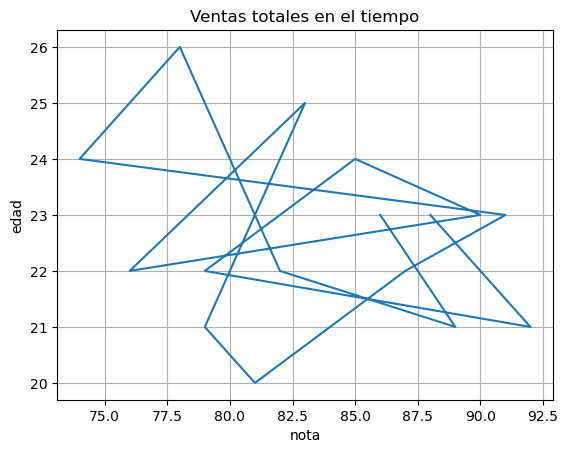

In [ ]:

# Gráfico de línea (ventas en el tiempo)
import matplotlib.pyplot as plt


plt.figure()
plt.plot(df_estudiantes["nota"], df_estudiantes["edad"])
plt.title("Ventas totales en el tiempo")
plt.xlabel("nota")
plt.ylabel("edad")
plt.grid(True)
plt.show()


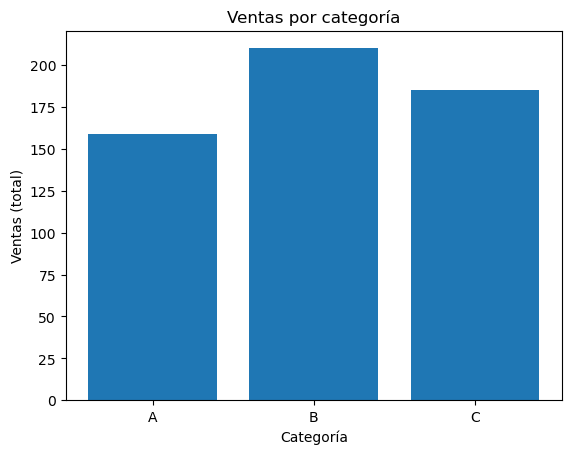

In [ ]:

# Barras: ventas por categoría
ventas_cat = df.groupby("categoria")["total"].sum()
plt.figure()
plt.bar(ventas_cat.index, ventas_cat.values)
plt.title("Ventas por categoría")
plt.xlabel("Categoría")
plt.ylabel("Ventas (total)")
plt.show()


In [ ]:
promedio=df_estudiantes.groupby("nota")["edad"].sum()
plt.figure()
plt.bar()


,nombre,apellidos,edad,nota,asignaturas
0,Gilson,Tenemea,23,88,"[Inteligencia Artificial, Formulación de Proye..."
1,Kenny,Valdivieso,21,92,"[Aplicaciones Seguras, Gestión de Proyectos]"
2,David,Lopez,22,79,[Aplicaciones en la nube]
3,Anthony,Fajardo,24,85,"[Inteligencia Artificial, Aprendizaje Automático]"
4,Carmen,Gomez,23,90,"[Bases de Datos, Gestión de Proyectos]"
5,Freddy,Neira,22,76,"[Redes, Seguridad Informática]"
6,Jhon,Montenegro,25,83,"[Programación Avanzada, Arquitectura de Software]"
7,David,Espinosa,21,79,"[Aplicaciones en la nube, DevOps]"
8,Jhony,Mendez,20,81,[Sistemas Operativos]
9,Alex,Loja,22,87,"[Programación, Estructuras de Datos]"


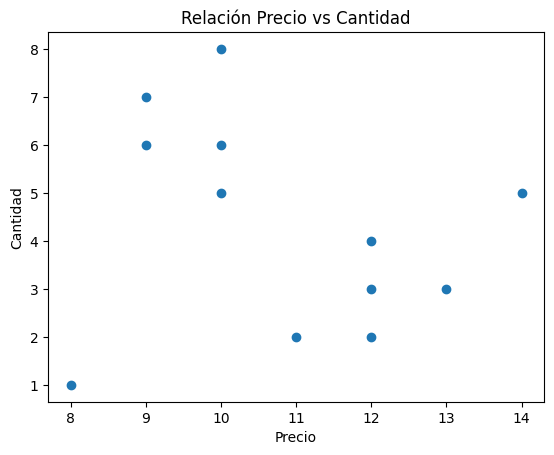

In [ ]:

# Dispersión: precio vs cantidad
plt.figure()
plt.scatter(df["precio"], df["cantidad"])
plt.title("Relación Precio vs Cantidad")
plt.xlabel("Precio")
plt.ylabel("Cantidad")
plt.show()


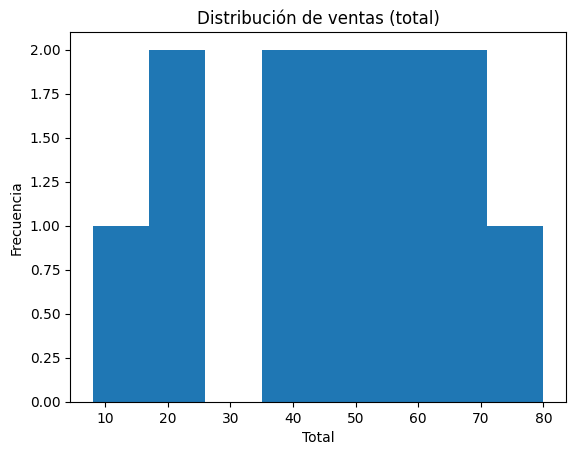

In [ ]:

# Histograma: distribución de totales
plt.figure()
plt.hist(df["total"], bins=8)
plt.title("Distribución de ventas (total)")
plt.xlabel("Total")
plt.ylabel("Frecuencia")
plt.show()



### 🧩 Ejercicios (Matplotlib)
1. Genera un gráfico de **líneas** que muestre la evolución del **precio promedio mensual**.  
2. Crea un gráfico de **barras** con las 5 combinaciones *producto–mes* con **mayor total**.  
3. Dibuja un **boxplot** del total por categoría (pista: prepara listas por categoría y usa `plt.boxplot`).  
4. Construye un **histograma** de `cantidad` con `bins=10` y analiza la distribución.



---
## 4) Plotly — Visualización Interactiva 🌐

**Objetivo de aprendizaje:**  
Construir gráficos interactivos (zoom, hover, selección) para explorar datos.

**Conceptos clave:**
- `plotly.express` para gráficos rápidos
- Interactividad: *hover*, *zoom*, *pan*, *legend click*
- Guardar a HTML


In [ ]:

# Barra interactiva: ventas por producto
df_prod = df.groupby("producto", as_index=False)["total"].sum()
fig_bar = px.bar(df_prod, x="producto", y="total", title="Ventas por producto (interactivo)")
fig_bar.show()


In [ ]:
df_est = df_estudiantes.groupby("")

In [ ]:

# Dispersión interactiva: precio vs cantidad
fig_scatter = px.scatter(df, x="precio", y="cantidad", size="total", color="categoria",
                         title="Precio vs Cantidad (interactivo)")
fig_scatter.show()


In [67]:
print (tabla_pivot)

NameError: name 'tabla_pivot' is not defined


### 🧩 Ejercicios (Plotly)
1. Construye un **gráfico de áreas** apiladas por categoría a lo largo del tiempo.  
2. Crea un **mapa de burbujas** (si tienes datos geográficos) o un **treemap** por categoría y producto.  
3. Exporta tu figura a HTML y comprueba que es interactiva abriéndola en el navegador.



---
## 5) Mini‑proyecto de Integración 🧪

**Reto:**  
1) Genera un DataFrame con ventas diarias de 6 meses para 4 productos.  
2) Usa **NumPy** para simular estacionalidad y ruido.  
3) Con **Pandas**, calcula KPIs: ventas totales, ticket promedio, top‑productos, tendencia por mes.  
4) Visualiza con **Matplotlib** un gráfico clave y con **Plotly** un dashboard simple (2–3 gráficos).  
5) Exporta: `df.to_csv("ventas_simuladas.csv", index=False)` y un HTML con tus gráficos interactivos.


,mes,ventas,cantidad,ticket_promedio
0,2024-01-01,13798.689544,1316,111.279754
1,2024-02-01,12732.589971,1228,109.763707
2,2024-03-01,14186.936154,1360,114.410775
3,2024-04-01,14986.114606,1432,124.884288
4,2024-05-01,16354.260457,1569,131.889197


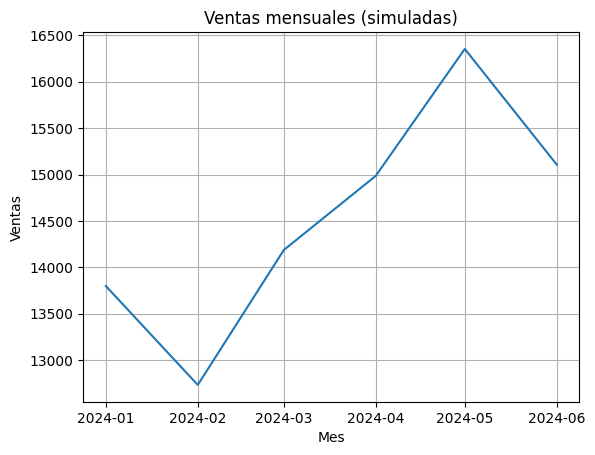

c:\Users\59399\anaconda3\lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\59399\anaconda3\lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Se guardaron 3 archivos HTML de gráficos interactivos.


In [ ]:

# Solución guía (puedes modificar y experimentar)
rng = np.random.default_rng(2025)
fechas = pd.date_range("2024-01-01", periods=180, freq="D")
productos = ["P1", "P2", "P3", "P4"]

df_sim = pd.DataFrame({
    "fecha": np.repeat(fechas, len(productos)),
    "producto": productos * len(fechas),
})

# Estacionalidad semanal + tendencia + ruido
semana = df_sim["fecha"].dt.dayofweek
estacional = 10 + 5*np.sin(2*np.pi*(semana/7))
tendencia = np.linspace(0, 3, len(df_sim))
ruido = rng.normal(0, 2, len(df_sim))

precio_base = {"P1": 10, "P2": 12, "P3": 9, "P4": 11}
df_sim["precio"] = df_sim["producto"].map(precio_base) + rng.normal(0, 0.7, len(df_sim))
df_sim["cantidad"] = np.clip(np.round(estacional + tendencia + ruido + rng.normal(0, 1, len(df_sim))), 0, None).astype(int)
df_sim["total"] = df_sim["precio"] * df_sim["cantidad"]

# KPIs por mes
df_sim["mes"] = df_sim["fecha"].dt.to_period("M").dt.to_timestamp()
kpis_mes = df_sim.groupby("mes", as_index=False).agg(
    ventas=("total", "sum"),
    cantidad=("cantidad", "sum"),
    ticket_promedio=("total", "mean")
)
display(kpis_mes.head())

# Visual con Matplotlib (1 figura)
plt.figure()
plt.plot(kpis_mes["mes"], kpis_mes["ventas"])
plt.title("Ventas mensuales (simuladas)")
plt.xlabel("Mes")
plt.ylabel("Ventas")
plt.grid(True)
plt.show()

# Dashboard rápido con Plotly
fig1 = px.line(kpis_mes, x="mes", y="ventas", title="Ventas mensuales (interactivo)")
fig2 = px.bar(df_sim.groupby("producto", as_index=False)["total"].sum(),
              x="producto", y="total", title="Ventas por producto (interactivo)")
fig3 = px.scatter(df_sim, x="precio", y="cantidad", size="total", color="producto", title="Precio vs Cantidad")

fig1.write_html("dashboard_ventas_linea.html")
fig2.write_html("dashboard_ventas_barras.html")
fig3.write_html("dashboard_ventas_dispersion.html")
print("Se guardaron 3 archivos HTML de gráficos interactivos.")



---
## 6) Checklist de Aprendizaje ✅

- [ ] Entiendo la diferencia entre **array (NumPy)** y **DataFrame (Pandas)**.  
- [ ] Puedo leer, filtrar y transformar datos con Pandas.  
- [ ] Sé crear gráficos básicos con Matplotlib sin estilos predefinidos.  
- [ ] Puedo construir y **exportar** gráficos interactivos con Plotly a HTML.  
- [ ] Integré todo en un mini-proyecto con KPIs y visualizaciones.
